In [21]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


The income per capita per US State in 2018 is approximately a normal distribution with a mean of \$48,500 and a standard deviation of $8,500.

    1) Create a PDF graph of this distribution with the proper labels on the axes.

Text(0.5,0.92,'Income Per Capita Per US State in 2018')

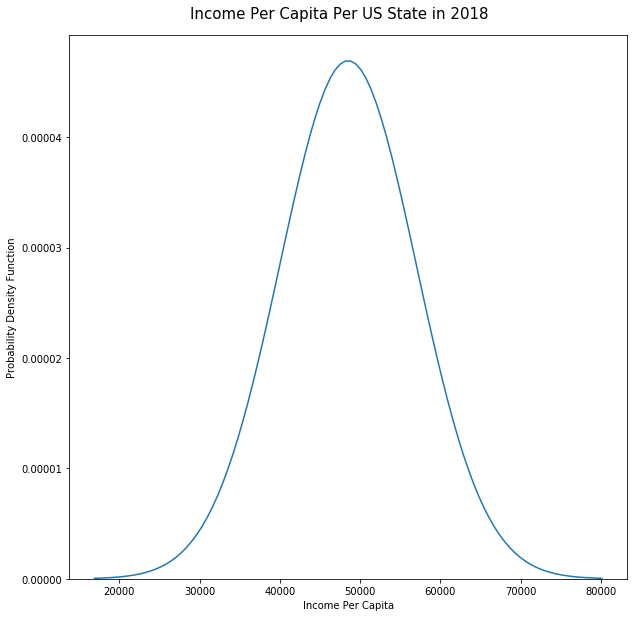

In [9]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(48500, 8500)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('Income Per Capita')
plt.ylabel('Probability Density Function')
fig.suptitle('Income Per Capita Per US State in 2018', fontsize=15, y=0.92)

2) Say we wanted to create a rejection region for any states with below average income. If we set the rejection region at 40,000, what would the percentile value of that be given the distribution?



In [10]:
stats.norm(48500, 8500).cdf(40000)

0.15865525393145707

3) Say that I'm a Senator from New York, which has an income per capita of \$64,500.

I believe that my state has an income that's conceivably different from the rest of the country - so different that I could convince someone that we're not even part of the United States. I want to use hypothesis testing to prove it.

Note that I am not surveying people - this is a single data point. In this case:

   a) What is the null hypothesis? 

**The income per capita in New York is the same as the income per capita in the rest of United States.**

b) What is the alternative hypothesis? 

**The income per capita in New York is different than the income per capita in the rest of the United States.**

c) Say I want to do a two-tailed test at a significance level of 0.05 to see if
   my hypothesis is true. What is my rejection region? Can I reject the null hypothesis here?  

In [11]:
print(stats.norm(48500, 8500).ppf(0.025), stats.norm(48500, 8500).ppf(0.975))

31840.306131409536 65159.69386859046


The rejection region is any income per capita less than 31,840 or any income per capita greater than 65,159. At this significance level, we fail to reject the null hypothesis.

 d) Seeing that the average income per capita for New York is obviously higher than the
   income per capita for the United States, I want to change my test to a one-tailed test.

   At the 0.05 significance level, what is my rejection region? Can I reject the null hypothesis here? 

In [12]:
print(stats.norm(48500, 8500).ppf(0.95))

62481.25582908752


At the 0.05 signifiance level, the one-tailed rejection region is any value greater than $62,481.25. At this significance level, we can reject the null hypothesis.

e) Say I want to keep the test one-tailed, but change my significance level to 0.01. What is my rejection region now? Can I reject the null hypothesis here? 

In [13]:
print(stats.norm(48500, 8500).ppf(0.99))

68273.95692934714


At the 0.01 signifiance level, the one-tailed rejection region is any value greater than $68,273.96. At this signifiance level, we fail to reject the null hypothesis.

4) Say now that I don't actually know the distribution of the income per capita per US State - I'm just making it up to sound smart. But I do survey ten state representatives from New York and get the following data points for income per capita of our state: [62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821, 63971]

    a) What is the sample mean for this distribution?

In [14]:
np.mean([62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821, 63971])

62026.9

b) What is the sample variance and sample standard deviation for this distribution?

In [15]:
print(np.var([62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821, 63971], ddof=1), np.std([62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821, 63971], ddof=1))

7466628.100000001 2732.513147269378


c) Say I again want to see if I can reject the null hypothesis that the income per capita for New York
    is the same as the income per capita for the United States.

       Note that this is based off of a survey of ten, so we would want to effectively see if the ten people we surveyed could have effectively been pulled from anywhere in the US, not just New York.
    d) Given a T-distribution with a mean of 50,000, our sample standard deviation, and nine degrees of freedom, what is the one-tailed rejection region at the 0.01 significance level? Can we reject the null hypothesis that New York has a different income per capita than the rest of the United States? Note that we are using our sample mean to determine this, not the previously stated value of $64,500. 

In [18]:
stats.t(loc=50000, scale=np.std([62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821, 63971], ddof=1)/np.sqrt(10), df=9).ppf(0.99)

52437.99471397861

Yes, we can reject the null hypothesis here, as the rejection region is any value above $52,437.99.

5) This information was actually pulled from the Wikipedia here - https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita.
Using the pd.read_html function, read in the table of U.S. State by GDP capita and plot a histogram and boxplot of the 2018 data in the first table. Are there any outliers, and if so, which states are outliers?

In [24]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita')[0]

Text(0.5,0.92,'Distribution of Income Per Capita Per US State in 2018')

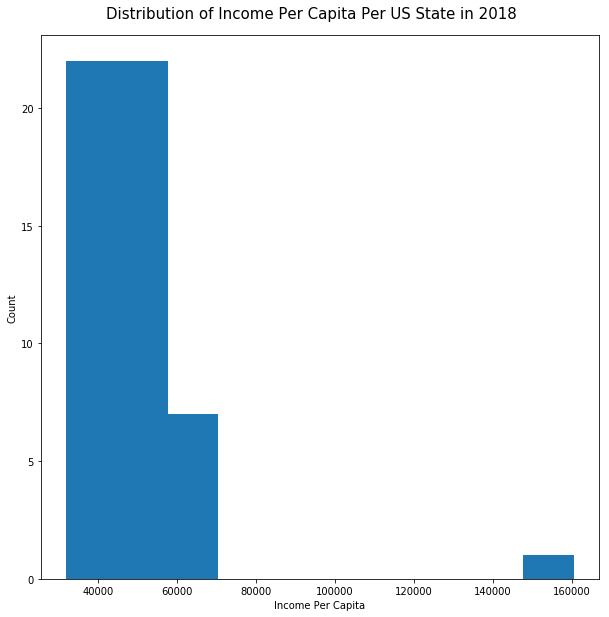

In [27]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(48500, 8500)
plt.hist(df['2018'])
plt.ylim(bottom=0)
plt.xlabel('Income Per Capita')
plt.ylabel('Count')
fig.suptitle('Distribution of Income Per Capita Per US State in 2018', fontsize=15, y=0.92)

Text(0.5,0.92,'Distribution of Income Per Capita Per US State in 2018')

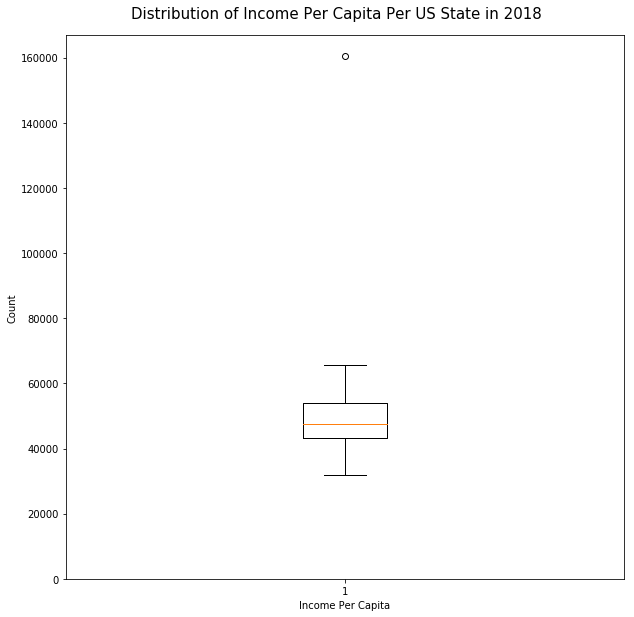

In [28]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(48500, 8500)
plt.boxplot(df['2018'])
plt.ylim(bottom=0)
plt.xlabel('Income Per Capita')
plt.ylabel('Count')
fig.suptitle('Distribution of Income Per Capita Per US State in 2018', fontsize=15, y=0.92)

In [30]:
df[df['2018'] > 100000]

,Rank,State,2018,2017,2016,2015,2014,2013,2012,2011
0,—,District of Columbia,160472,159227,159395,159497,163274,166870,168030,166178


The District of Columbia is an outlier.

BONUS 6) Remove the outlier (if there is one), and replot a histogram and boxplot of the data. Are there any outliers now?

Text(0.5,0.92,'Distribution of Income Per Capita Per US State in 2018')

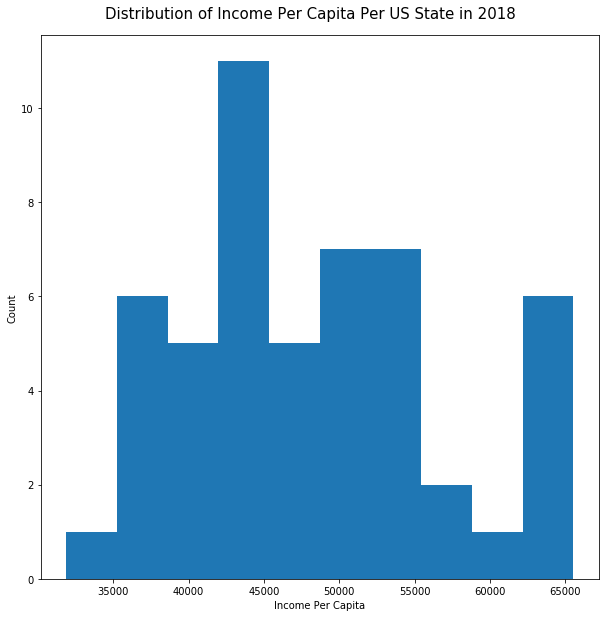

In [33]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(48500, 8500)
plt.hist(df[df['State'] != 'District of Columbia']['2018'])
plt.ylim(bottom=0)
plt.xlabel('Income Per Capita')
plt.ylabel('Count')
fig.suptitle('Distribution of Income Per Capita Per US State in 2018', fontsize=15, y=0.92)

Text(0.5,0.92,'Distribution of Income Per Capita Per US State in 2018')

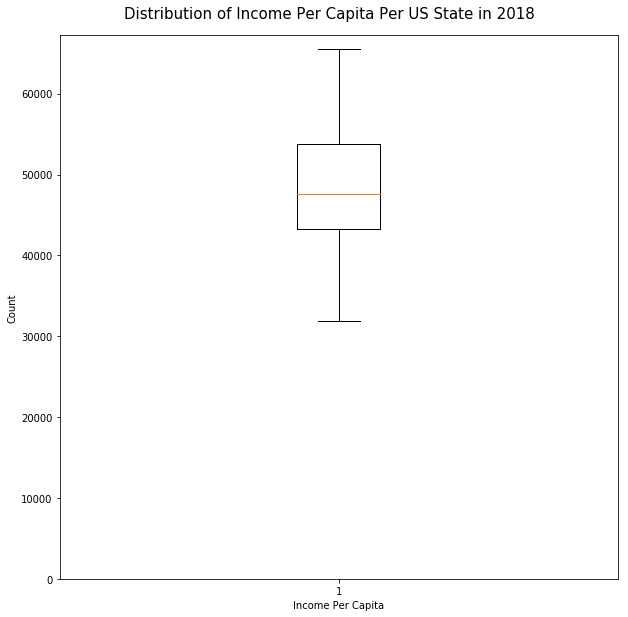

In [34]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(48500, 8500)
plt.boxplot(df[df['State'] != 'District of Columbia']['2018'])
plt.ylim(bottom=0)
plt.xlabel('Income Per Capita')
plt.ylabel('Count')
fig.suptitle('Distribution of Income Per Capita Per US State in 2018', fontsize=15, y=0.92)

There are no longer any outliers.